# K-Nearest-Neighbours (KNN)

KNN er en af de simpleste algoritmer inden for ML. Så simpelt at den kan beskrives ved følgende operationer:

1. Start med $N$ forskellige træningspunkter, hver med deres egen klasse $j$. Eksempelvis kan vi sige 10 punkter, 4 af dem har klassen "rød", 6 af dem har klassen "blå"
2. Vælg en værdi til hyperparameteren "K". Den skal være et heltal
3. Kom med et af dine testpunkter, dvs. en af dem du ikke kender klassen på.
4. Lav en rangeret liste af hvilke træningspunkter der er tættest på dette nye testpunkt.
5. Vælg de $K$ første af disse træningspunkter, dvs. de $K$ af de træningspunkter der er tættest på dette testpunkt
6. Vælg klassen af det nye testpunkt ved at se hvad de fleste af disse $K$ "nærmeste naboer" har som punkt. Eksempelvis, hvis $K = 5$, og tre af de nærmeste punkter er klassen "rød" og to er klassen "blå", vil det nye punkt være klassen "rød"
7. Gentag for alle nye punkter.
8. OBS: Du bruger ikke forudsigelserne af testpunkterne til at bestemme klasserne af de nye punkter. Rækkefølgen du tager punkter ud til at teste må altså ikke have nogen effekt på hvad dine forudsigelser bliver.

I bund og grund kan dette koges ned til "lol, bare kig på hvad der er ved siden af det nye punkt". Det lyder måske for dumt til at virke, men det virker altså. Specielt når kombineret med andre metoder som preprocessering.  

Implementationen af KNN er ligeledes også rimelig simpel, og er en af de få ML metoder man kan implementere, forstå, og benytte, uden meget matematisk intuition.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# TODO: Hav en måde at kunne printe forskellige sets med forskellige set af farver/mærker
# TODO: Byt om på måde som misclassified/real classified markeres, lige nu er det lidt
# counterintuitive at røde kryder burde være blå cirkler?

# TODO:

# - Manuel implementation af KNN


In [ ]:
def generate_knn_points(n, ls, class_params):
    """
    Generer n tilfældige punkter
    
    Parametre:
        n (int): Totale mængde af punkter.
        ls (list): Proportioner (procent) af hver klasse. 
                                Længden af listen giver hvor mange klasser der er 
        class_params (list): List af parametre for hver normalfordeling der genererer punkterne.
                                Hvert element skal være en tuple af parametre for hver klasse: 
                                (mean_x1, mean_x2, std_x1, std_x2).
    
    Returnerer:
        numpy.ndarray: Array med shape (n, 3) hvor hver række er [x1, x2, y].
                        x1, x2 er koordinater, y label.
    """
    # Check om givne værdier passer til funktionen
    if abs(sum(ls) - 1.0) > 1e-6:
        raise ValueError("Klasse proportionerne skal summe til én!")
    if len(ls) != len(class_params):
        raise ValueError("Mængde af klasser skal matche mængden af sæt af parametre!")

    points = []
    
    for i, proportion in enumerate(ls):
        # Mængden af punkter i denne klasse
        count = int(n * proportion)
        mean_x1, mean_x2, std_x1, std_x2 = class_params[i]

        # x værdier (features) for dette punkt
        x1 = np.random.normal(mean_x1, std_x1, count)
        x2 = np.random.normal(mean_x2, std_x2, count)
        y = np.full(count, i)
        
        points.append(np.column_stack((x1, x2, y)))
    
    return np.vstack(points)

# Eksempel brug
n = 100
ls = [0.4, 0.6]
class_params = [(0, 0, 1, 1), (2, 2, 1, 1)]
points = generate_knn_points(n, ls, class_params)

In [ ]:
def split_train_test(data, train_ratio=0.8):
    """
    Split datasættet til træning og test tilfældigt
    """
    n = data.shape[0]
    indices = np.arange(n)

    # Shuffle indekser for at sikre tilfældighed
    np.random.shuffle(indices)

    # Find størrelse af træningssættet
    train_size = int(n * train_ratio)
    train_indices = indices[:train_size]

    # Resten af punkterne må være testsættet
    test_indices = indices[train_size:]

    train_set = data[train_indices]
    test_set = data[test_indices]

    return train_set, test_set

# Eksempel på brug
train_ratio = 0.8
train_set, test_set = split_train_test(points, train_ratio=train_ratio)

print(f"Train set shape: {train_set.shape}")
print(f"Test set shape: {test_set.shape}")


Train set shape: (800, 3)
Test set shape: (200, 3)


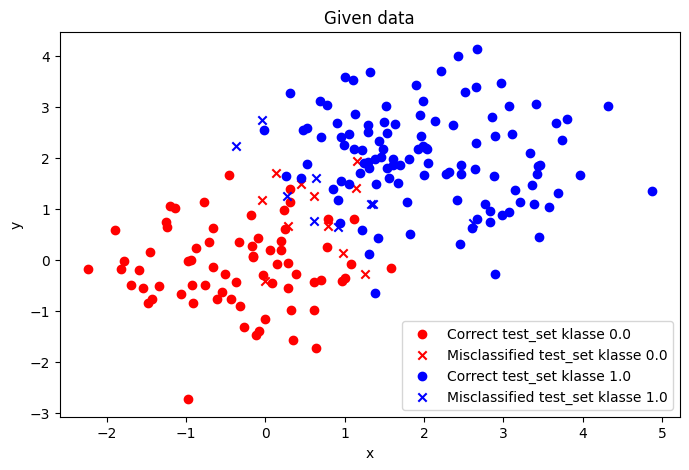

In [ ]:
def plot_data(points_set, predictions_set=None, point_names=None):
    """
    Antager at points_set er liste af points... 
    hvor de hver især er af dimension [n, (x_0, x_1, ..., x_n, y)]
    """

    colors = ['red', 'blue', 'green', 'yellow', 'AMERICAN']

    # Hvis ingen points_names er givet, laver vi automatisk lige et
    if not point_names:
        point_names = [f"Set {i}" for i, _ in enumerate(points_set) ]
    # Hvis intet 'predictions' sæt er givet, laver vi bare et dummy sæt
    if predictions_set is None:
        predictions_set = [None] * len(points_set)
        
    plt.figure(figsize=(8, 5))
    for i, (points, preds) in enumerate(zip(points_set, predictions_set)):

        # Hvis ingen predictions er givet sætter vi bare "predicted" som aktuel klasse
        if preds is None:
            preds = points[:,-1]

        points = np.hstack((points, preds[:, None]))
        # Find mængde unikke labels fra dataen
        unique_labels = np.unique(points[:, -1])
        
        # Plot punkter baseret på deres /klasserlabels
        for r, label in enumerate(unique_labels):
            # Vælg alle punkter med den aktuelle klasse/label
            subset = points[points[:,-1] == label]
            correct = subset[subset[:,-1] == subset[:,-2]]
            misclassified = subset[subset[:,-1] != subset[:,-2]]

            plt.scatter(correct[:, 0], correct[:, 1], color=colors[r],
                        label=f'Correct {point_names[i]} klasse {label}', marker='o')
            
            plt.scatter(misclassified[:, 0], misclassified[:, 1], color=colors[r],
                        label=f'Misclassified {point_names[i]} klasse {label}', marker='x')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Given data')
    plt.show()

# Eksempel på brug
plot_data([test_set], predictions_set=[result['predictions']], point_names=['test_set'])

Predicted Labels: [0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0.]
Accuracy: 0.90


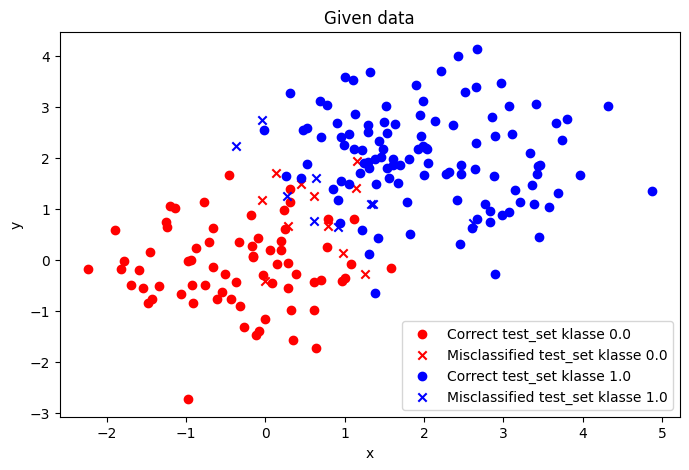

In [ ]:
def knn_sklearn(train_set, test_set, k=3):
    """
    Brug sklearn til at lave KNN på træning- og test-sæt

    Parametre:
        train_set (numpy.ndarray): Træningssæt med form [n_train, (x1, x2, y)].
        test_set (numpy.ndarray): Test sæt med form [n_test, (x1, x2, y)].
        k (int): Mængden af 'naboer' vi kigger efter(default is 3).

    Returns:
        dict: Et dictionary som indeholder predictions, accuracy, og classifier'en
    """
    # Find features af træning og derefter test sættet,
    # Vi antager at alt før den sidste må være features
    X_train = train_set[:, :-1]
    y_train = train_set[:, -1]
    X_test = test_set[:, :-1]
    y_test = test_set[:, -1]

    # Lav KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit modellen på træningssættet
    knn.fit(X_train, y_train)

    # Predict labels på test sættet
    y_pred = knn.predict(X_test)

    # Udregn accuracy af predictions
    accuracy = accuracy_score(y_test, y_pred)

    return {
        'predictions': y_pred,
        'accuracy': accuracy,
        'classifier': knn
    }

# Eksempel på brug:
result = knn_sklearn(train_set, test_set, k=1)
print(f"Predicted Labels: {result['predictions']}")
print(f"Accuracy: {result['accuracy']:.2f}")

# Eksempel på brug
plot_data([test_set], predictions_set=[result['predictions']], point_names=['test_set'])

In [2]:
def generate_knn_data(num_points, categories=None, dimension=2, custom_distributions=None):
    if categories is None:
        # Generate uniform categories if none are provided
        unique_labels = [f"class_{i}" for i in range(2)]  # Default to 3 classes
        probabilities = [1 / len(unique_labels)] * len(unique_labels)
        categories = dict(zip(unique_labels, probabilities))

    # TODO: Fix one-off errors in regards to how many points are generated
    num_points = [int(num_points * prob) for prob in categories.values()]
    points = {unique_labels[i]: num_points[i] for i in range(len(num_points))}

    for i, points in enumerate(num_points):
        all_points = []
        if custom_distributions[i] is not None:
            all_points.append(custom_distributions[i](points)) # Expects that custom_distributions[i] is a lambda

        else:
            all_points.append(np.random.rand(points, dimension))

    labels = np.array([categories[i] for i in range(len(num_points))])
    points = np.vstack(all_points)
    points = np.hstack((points, labels[:, None]))
    


    labels = list(categories.keys())
    probabilities = list(categories.values())

    # Generate labels according to the categorical distribution
    generated_labels = np.random.choice(labels, size=num_points, p=probabilities)

    points = []
    for label in labels:
        count = np.sum(generated_labels == label)
        if custom_distributions and label in custom_distributions:
            # Use custom distribution for the label
            points.append(custom_distributions[label](count))
        else:
            # Generate points uniformly within the range [0, 1] in each dimension
            points.append(np.random.rand(count, dimension))

    # Concatenate all points and return
    points = np.vstack(points)
    return points, generated_labels

def generate_knn_data_simple(num_points, proportions=[0.6, 0.4], dimension=2):
    assert np.sum(proportions) == 1

    points = np.random.randn(num_points, dimension)

    # TODO: Examine and fix one-off error here!
    labels = []
    for i, r in enumerate(proportions):
        labels += [i] * int(num_points * r) 

    # Here we have a dictionary as a dataset, usually this would be just a numpy array, torch tensor, etc.
    dataset = [{"label": label, "features": point} for label, point in zip(labels, points)]
    
    # Generate values by which to shift other classes than class 0
    shift_vals = [np.random.randn(dimension) for i in range(len(proportions) - 1)]

    for i in dataset:
        




    # # Shift value to shift class away from the other:
    # shift_val = np.random.randn(dimension)

generate_knn_data_simple(100)


def plot_knn_data(points, labels):
    # Assign a unique color to each label
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap('Set1', len(unique_labels))

    # Create the scatter plot
    for i, label in enumerate(unique_labels):
        mask = np.array(labels) == label
        plt.scatter(points[mask, 0], points[mask, 1], label=label, color=colors(i), alpha=0.7)

    plt.legend()
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("KNN Data Scatter Plot")
    plt.show()



IndentationError: expected an indented block (3980834153.py, line 71)

In [6]:
custom_distributions = {
    "A": lambda n: np.random.normal(loc=0.2, scale=0.1, size=(n, 2)),
    "B": lambda n: np.random.normal(loc=20, scale=0.2, size=(n, 2)),
    "C": lambda n: np.random.normal(loc=0.5, scale=0.15, size=(n, 2))
}
categories = {"A": 0.5, "B": 0.3, "C": 0.2}


points, labels = generate_knn_data(100, categories=categories, custom_distributions=custom_distributions)

plot_knn_data(points, labels)

NameError: free variable 'unique_labels' referenced before assignment in enclosing scope

In [2]:
# Her defineres en funktion til at generere datasæt
def generate_data(num_points, points_per_class=None):
    np.random.seed(0)
    # Klasse -1
    points_neg = np.random.randn(50, 2) - 1  # Flytter denne klump til venstre
    labels_neg = -1 * np.ones(50)

    # Klasse 1
    points_pos = np.random.randn(50, 2) + 1  # Flytter denne klump til højre
    labels_pos = np.ones(50)

    # Samle træningsdata
    all_points = np.vstack((points_neg, points_pos))
    all_labels = np.concatenate((labels_neg, labels_pos))

    test_indices = np.random.choice(np.arange(len(all_points)),size=20, replace=False) # 20 test points
    test_points = all_points[test_indices]
    test_labels = all_labels[test_indices]
    
    train_mask = np.full(len(all_points), True)
    train_mask[test_indices] = False
    training_points = all_points[train_mask]
    training_labels = all_labels[train_mask]        

    return training_points, training_labels, test_points, test_labels

training_points, training_labels, test_points, test_labels = generate_data()

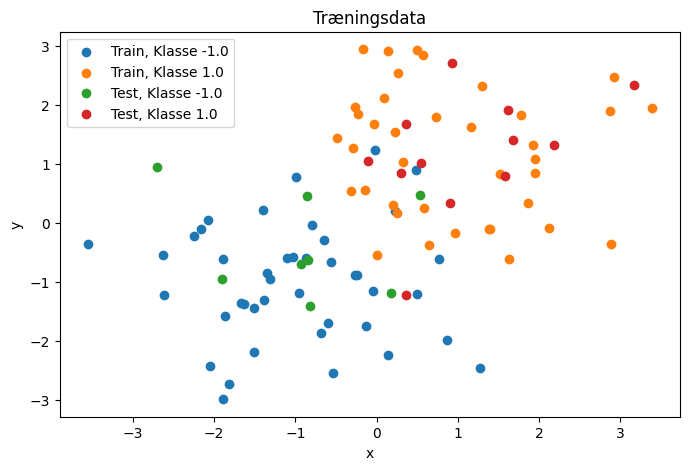

In [3]:
# Her defineres en funktion til at plotte træningsdata og testdata
def plot_training_data(training_points, training_labels):
    plt.figure(figsize=(8, 5))
    # Plot punkter baseret på deres /klasserlabels
    for label in np.unique(training_labels):
        # Vælg alle punkter med den aktuelle klasse/label
        subset = training_points[training_labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Train, Klasse {label}')

    for label in np.unique(test_labels):
        # Vælg alle punkter meds den aktuelle klasse/label
        subset = test_points[test_labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Test, Klasse {label}')


    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Træningsdata')
    plt.show()

plot_training_data(training_points, training_labels)

In [62]:
import numpy as np

def get_misclassifications(test_set, predictions):
    """
    Find misclassifications from the test set.

    Parameters:
        test_set (numpy.ndarray): Testing data of shape [n_test, (x1, x2, y)].
        predictions (numpy.ndarray): Predicted labels for the test set.

    Returns:
        numpy.ndarray: Array of misclassified points with their true labels and predicted labels.
    """
    # Extract true labels from the test set
    y_test = test_set[:, -1]
    
    # Find indices where the predicted labels differ from true labels
    misclassified_indices = np.where(y_test != predictions)[0]
    
    # Extract misclassified points
    misclassified_points = test_set[misclassified_indices]
    
    # Append predicted labels for the misclassified points
    misclassified_points_with_predictions = np.hstack(
        (misclassified_points, predictions[misclassified_indices].reshape(-1, 1))
    )

    return misclassified_points_with_predictions

# Example usage:
misclassified_points = get_misclassifications(test_set, result['predictions'])

print("Misclassified points (x1, x2, true label, predicted label):")
print(misclassified_points)


Misclassified points (x1, x2, true label, predicted label):
[[ 0.41234351  1.42695282  0.          1.        ]
 [-1.15740156  1.87202116  0.          1.        ]
 [ 0.52942012  0.01737644  1.          0.        ]
 [ 0.28670888  0.87989213  0.          1.        ]
 [ 1.14918511 -0.5366356   1.          0.        ]
 [-0.20746407  0.51259037  1.          0.        ]
 [ 0.74499355 -2.20964639  1.          0.        ]
 [ 0.31491308 -0.49240813  0.          1.        ]
 [-0.26548716 -0.78997708  1.          0.        ]
 [ 0.99679147  0.15361399  1.          0.        ]
 [ 2.04907302  0.00765741  1.          0.        ]
 [-0.49329912  1.6159442   1.          0.        ]
 [-0.37474552  0.07762131  1.          0.        ]
 [ 0.52905402 -0.51891492  1.          0.        ]
 [-0.25023253 -0.45568604  1.          0.        ]
 [ 0.61611041  0.56492383  1.          0.        ]
 [-0.98944156  0.10891573  1.          0.        ]
 [ 1.86675888 -0.71067899  0.          1.        ]
 [-0.27015878 -0.22225

In [63]:
import numpy as np

def get_misclassifications_with_neighbors(test_set, predictions, classifier, k):
    """
    Find misclassifications and their k-nearest neighbors with classes.

    Parameters:
        test_set (numpy.ndarray): Testing data of shape [n_test, (x1, x2, y)].
        predictions (numpy.ndarray): Predicted labels for the test set.
        classifier: Fitted KNeighborsClassifier instance.
        k (int): Number of neighbors to find.

    Returns:
        list: List of dictionaries where each dictionary contains the following:
              - misclassified_point: The misclassified data point.
              - true_label: True label of the point.
              - predicted_label: Predicted label of the point.
              - neighbors: K-nearest neighbors' coordinates.
              - neighbor_classes: K-nearest neighbors' class labels.
    """
    # Extract true labels from the test set
    y_test = test_set[:, -1]
    
    # Find indices of misclassified points
    misclassified_indices = np.where(y_test != predictions)[0]
    
    results = []
    
    for idx in misclassified_indices:
        # Get the misclassified point and its true/predicted labels
        misclassified_point = test_set[idx, :2]
        true_label = y_test[idx]
        predicted_label = predictions[idx]
        
        # Find k-nearest neighbors using the classifier
        distances, neighbor_indices = classifier.kneighbors(misclassified_point.reshape(1, -1), n_neighbors=k)
        neighbors = classifier._fit_X[neighbor_indices[0]]  # Coordinates of neighbors
        neighbor_classes = classifier._y[neighbor_indices[0]]  # Classes of neighbors
        
        # Append results for this point
        results.append({
            'misclassified_point': misclassified_point,
            'true_label': true_label,
            'predicted_label': predicted_label,
            'neighbors': neighbors,
            'neighbor_classes': neighbor_classes
        })
    
    return results

# Example usage:
misclassified_neighbors = get_misclassifications_with_neighbors(test_set, result['predictions'], result['classifier'], k=3)

for entry in misclassified_neighbors:
    print(f"Misclassified Point: {entry['misclassified_point']}, True Label: {entry['true_label']}, Predicted Label: {entry['predicted_label']}")
    print(f"K Nearest Neighbors: {entry['neighbors']}")
    print(f"Neighbor Classes: {entry['neighbor_classes']}")
    print()


Misclassified Point: [0.41234351 1.42695282], True Label: 0.0, Predicted Label: 1.0
K Nearest Neighbors: [[0.31289048 1.43873638]
 [0.29078331 1.41956824]
 [0.26875569 1.486619  ]]
Neighbor Classes: [1 1 1]

Misclassified Point: [-1.15740156  1.87202116], True Label: 0.0, Predicted Label: 1.0
K Nearest Neighbors: [[-1.07814365  1.67013719]
 [-1.41073522  1.78795831]
 [-0.99804282  1.59002933]]
Neighbor Classes: [1 0 1]

Misclassified Point: [0.52942012 0.01737644], True Label: 1.0, Predicted Label: 0.0
K Nearest Neighbors: [[ 0.55419365  0.08008817]
 [ 0.45899417  0.02033249]
 [ 0.48913071 -0.07655687]]
Neighbor Classes: [0 1 0]

Misclassified Point: [0.28670888 0.87989213], True Label: 0.0, Predicted Label: 1.0
K Nearest Neighbors: [[0.37404036 0.92140255]
 [0.38971975 0.89264201]
 [0.18561683 0.90981028]]
Neighbor Classes: [1 1 1]

Misclassified Point: [ 1.14918511 -0.5366356 ], True Label: 1.0, Predicted Label: 0.0
K Nearest Neighbors: [[ 1.11707528 -0.43349954]
 [ 1.2593188  -0.425

## KNN decision boundaries

- Noget om hvordan en så simpel metode laver ikke-lineære decision boundaries
- Noget om hvordan bias og variance kan blive traded-off via at skifte K til at være større eller mindre

In [ ]:
## KNN egen implementering

# Support Vector Machines

# Gaussiske Processer

Før du læser videre, gå da ind på [denne hjemmeside](http://www.infinitecuriosity.org/vizgp/), og leg lidt rundt, klik på et par forskellige ting, ændre på et par værdier, og prøv at komme med et gæt på hvad metoden gør...

